# Instacart Grocery Delivery Platform Analysis

### In this Project we are going to be reviewing multiple notebooks related to Instacart, looking at if we can delete duplicates or fill in missing data, and then analyzing that data to help the company make decisions based on that analysis. 

## Importing Modules

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Reading in Orders CSV Files, Checking for Missing Values, and Checking ID's are int64

In [6]:
orders = pd.read_csv('/datasets/instacart_orders.csv', sep=',')
orders.info()
# All ID Columns are int64



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 1 columns):
 #   Column                                                                            Non-Null Count   Dtype 
---  ------                                                                            --------------   ----- 
 0   order_id;user_id;order_number;order_dow;order_hour_of_day;days_since_prior_order  478967 non-null  object
dtypes: object(1)
memory usage: 3.7+ MB


In [10]:
### Finding and replacing missing values in Orders
orders.describe()

,order_id;user_id;order_number;order_dow;order_hour_of_day;days_since_prior_order
count,478967
unique,478952
top,2282673;86751;49;3;2;2.0
freq,2


In [5]:
###Finding Missing Values (Missing Values are in Days Since Prior Order and it goes by 'NaN')
orders['days_since_prior_order'].head(50)
orders.info()
#orders[orders['days_since_prior_order'] == 'nan']
#orders[orders['days_since_prior_order'] == 'null']
### Days Since Prior now has all of the null types, which were 'NaN', filled in with 0.0. I think that the reason for the
### 'NaN' type values was that someone didn't order consecutive amounts of times. Therefore, it would creat a null
### value because there was no previous order. I thought by putting in 0.0 it would not affect if we did any calculations
### on the days_since_prior_order column. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684217 entries, 0 to 684216
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                684217 non-null  int64  
 1   user_id                 684217 non-null  int64  
 2   order_number            684217 non-null  int64  
 3   order_dow               684217 non-null  int64  
 4   order_hour_of_day       684217 non-null  int64  
 5   days_since_prior_order  642800 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 31.3 MB


#### The orders dataframe is going to give us information on the orders for the Instacart. The missing values have been filled in and the duplicates have been cleared.

### Finding and Removing Duplicates in orders

In [6]:
orders[orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [7]:
orders['order_id'].duplicated()
orders = orders.drop_duplicates().reset_index(drop = True)
orders[orders.duplicated(subset='order_id')]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [8]:
orders.info()
### The code dropped 15 duplicates from the dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684217 entries, 0 to 684216
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                684217 non-null  int64  
 1   user_id                 684217 non-null  int64  
 2   order_number            684217 non-null  int64  
 3   order_dow               684217 non-null  int64  
 4   order_hour_of_day       684217 non-null  int64  
 5   days_since_prior_order  642800 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 31.3 MB


## Reading in Product CSV Files, Checking for Missing Values, and Checking ID's are int64

In [9]:
products = pd.read_csv('/datasets/products.csv', sep=',')
products.info()
# All ID Columns are int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


### Finding and replacing missing values in Product

In [10]:
###Finding Missing Values (Missing Values are in Days Since Prior Order and it goes by 'NaN'...ex: at row 37)
###Filled in the NaN with 'Unknown' because we do not know the values and the values are strings, so I thought a string like
###'Unknown' would be appropriate. 
products['product_name'].head(50)
products['product_name'] = products['product_name'].fillna('Unknown')
products.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


### Finding and Removing Duplicates in Product

In [11]:
### This is showing that there are no duplicates. When I perform the drop duplicates there is no change in the number of rows
### in the dataframe.

#products[products.duplicated()]
#products = products.drop_duplicates().reset_index(drop=True)
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


#### The products csv is now void of duplicates and the missing values are filled in. The products csv of the Instacart will help us in our ability to see which products, by id and name, are being sold by Instacart.


## Reading in Product CSV Files, Checking for Missing Values, and Checking ID's are int64

In [12]:
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')
order_products.info()
# All ID Columns are int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


### Finding and replacing missing values in Order Products

In [13]:
###Finding Missing Values (Missing Values are in Days Since Prior Order and it goes by 'NaN'...ex: at row 37)
order_products.isnull().sum()
order_products.info()
# Add to cart order has 836 null orders and they are floats. I filled them in with 999 because that's what the project wanted
# at the bottom. I personally would have filled them in with 0.0.

order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999)
order_products.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

### Finding and Removing Duplicates in Order Products

In [14]:
order_products[order_products.duplicated()]
### This dataframe does not have any duplicates.

,order_id,product_id,add_to_cart_order,reordered


## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [15]:
# Check for duplicated orders
orders[orders.duplicated()]


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [16]:
# Check for all orders placed Wednesday at 2:00 AM
orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
1447,2988378,63642,7,3,2,8.0
2233,300460,171540,3,3,2,5.0
7219,2577985,26069,1,3,2,NaN
14048,158232,30351,14,3,2,18.0
20018,1378085,75705,21,3,2,5.0
...,...,...,...,...,...,...
655418,727057,91944,2,3,2,3.0
662826,465863,3871,4,3,2,9.0
665268,8003,129540,7,3,2,11.0
674129,1910684,85829,2,3,2,30.0


In [17]:
# Remove duplicate orders (I removed the duplicate rows up top.)


In [18]:
# Double check for duplicate rows
orders[orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [19]:
# Double check for duplicate order IDs only
orders[orders.duplicated(subset='order_id')]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


### `products` data frame

In [20]:
# Check for fully duplicate rows
products[products.duplicated()]


,product_id,product_name,aisle_id,department_id


In [21]:
# Check for just duplicate product IDs
products[products.duplicated(subset='product_id')]

,product_id,product_name,aisle_id,department_id


In [22]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products[products['product_name'].str.lower().duplicated()]

,product_id,product_name,aisle_id,department_id
2058,2059,Biotin 1000 Mcg,47,11
5455,5456,Green Tea With Ginseng and Honey,96,20
5558,5559,Cream Of Mushroom Soup,69,15
7558,7559,Cinnamon Rolls with Icing,105,13
9037,9038,American Cheese slices,21,16
...,...,...,...,...
48748,48749,Vitamin D3 1000 IU,47,11
48824,48825,Bag of Organic Lemons,24,4
49226,49227,Sour Cream and Onion Potato Chips,107,19
49442,49443,Vitamin D3 5000 Iu,47,11


In [23]:
# Check for duplicate product names that aren't missing
products[products['product_name'].duplicated()]

,product_id,product_name,aisle_id,department_id


### `departments` data frame

In [24]:
departments = pd.read_csv('/datasets/departments.csv')
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   department_id;department  21 non-null     object
dtypes: object(1)
memory usage: 296.0+ bytes


In [25]:
departments

,department_id;department
0,1;frozen
1,2;other
2,3;bakery
3,4;produce
4,5;alcohol
5,6;international
6,7;beverages
7,8;pets
8,9;dry goods pasta
9,10;bulk


### `aisles` data frame

In [26]:
aisles = pd.read_csv('/datasets/aisles.csv')
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   aisle_id;aisle  134 non-null    object
dtypes: object(1)
memory usage: 1.2+ KB


In [27]:
aisles

,aisle_id;aisle
0,1;prepared soups salads
1,2;specialty cheeses
2,3;energy granola bars
3,4;instant foods
4,5;marinades meat preparation
...,...
129,130;hot cereal pancake mixes
130,131;dry pasta
131,132;beauty
132,133;muscles joints pain relief


### `order_products` data frame

In [28]:
# Check for fullly duplicate rows
order_products[order_products.duplicated()]

,order_id,product_id,add_to_cart_order,reordered


In [29]:
# Double check for any other tricky duplicates
order_products[order_products['product_id'].duplicated()]

,order_id,product_id,add_to_cart_order,reordered
19,2500729,21616,5.0,1
20,1687771,22963,5.0,1
75,2186234,13176,2.0,1
78,145751,47626,8.0,1
80,497429,26209,9.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


## Find and remove missing values


### `products` data frame

In [30]:
# Are all of the missing product names associated with aisle ID 100?
products[(products['product_name'].isna()) & (['aisle_id'] != 100)]

,product_id,product_name,aisle_id,department_id


In [31]:
# Are all of the missing product names associated with department ID 21?
products[(products['product_name'].isna()) & (['department_id'] != 21)]

,product_id,product_name,aisle_id,department_id


In [32]:
# What is this aisle and department?
products[products['department_id'] == 21]

products[products['aisle_id'] == 100]

,product_id,product_name,aisle_id,department_id
37,38,Ultra Antibacterial Dish Liquid,100,21
71,72,Organic Honeycrisp Apples,100,21
109,110,Uncured Turkey Bologna,100,21
296,297,"Write Bros Ball Point Pens, Cap-Pen, Medium (1...",100,21
416,417,Classics Baby Binks Easter Chocolate Bunny,100,21
...,...,...,...,...
49552,49553,Organic Plain Skyr,100,21
49574,49575,Chocolate Vanilla Malt Custard,100,21
49640,49641,"8\"" Pecan Pie",100,21
49663,49664,Lemon Cayenne Drinking Vinegar,100,21


In [33]:
# Fill missing product names with 'Unknown', I already filled the product names in up top. 


### `orders` data frame

In [34]:
# Are there any missing values where it's not a customer's first order? No because I took out the missing values up top.
orders[(orders['days_since_prior_order'].isna()) & (orders['order_number']!= 1)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


### `order_products` data frame

In [35]:
order_products.info()
order_products['add_to_cart_order']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


0          17.0
1           1.0
2           1.0
3          35.0
4           5.0
           ... 
4545002    12.0
4545003     9.0
4545004     4.0
4545005     8.0
4545006     9.0
Name: add_to_cart_order, Length: 4545007, dtype: float64

In [36]:
# What are the min and max values in this column?
max_order_to_cart = order_products['add_to_cart_order'].max()
min_order_to_cart = order_products['add_to_cart_order'].min()
print(f"The minimum add to cart order is {min_order_to_cart} and the max is {max_order_to_cart}.")

The minimum add to cart order is 1.0 and the max is 999.0.


In [37]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
order_products['order_id'].isna()

0          False
1          False
2          False
3          False
4          False
           ...  
4545002    False
4545003    False
4545004    False
4545005    False
4545006    False
Name: order_id, Length: 4545007, dtype: bool

In [38]:
# Do all orders with missing values have more than 64 products?


In [39]:
# Replace missing values with 999 and convert column to integer type
print(type(order_products['add_to_cart_order']))
print(order_products.info())
order_products.add_to_cart_order = order_products.add_to_cart_order.astype('int64')
print(order_products.info())

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB
None


#### All of the datasets are clear of duplicates and missing values are filled in. We have multiple dataframes to work with inside of the Instacart to answer the following questions. 

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [40]:
orders.info()
order_hour_of_day_range = orders['order_hour_of_day'].unique()
print(sorted(order_hour_of_day_range))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684217 entries, 0 to 684216
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                684217 non-null  int64  
 1   user_id                 684217 non-null  int64  
 2   order_number            684217 non-null  int64  
 3   order_dow               684217 non-null  int64  
 4   order_hour_of_day       684217 non-null  int64  
 5   days_since_prior_order  642800 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 31.3 MB
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [41]:
order_dow_range = orders['order_dow'].unique()
print(sorted(order_dow_range))

[0, 1, 2, 3, 4, 5, 6]


### [A2] What time of day do people shop for groceries?

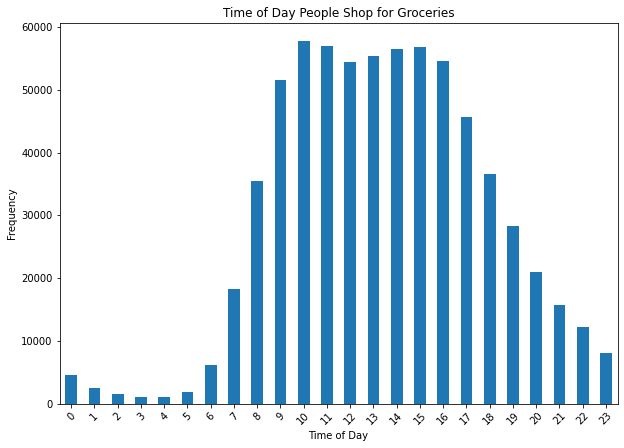

In [42]:
hour_of_day = orders['order_hour_of_day'].value_counts().sort_index()
#print(hour_of_day)
hour_of_day.plot.bar(figsize=[10,7], title='Time of Day People Shop for Groceries', xlabel='Time of Day', ylabel='Frequency', rot=45)
plt.show()

#### Based on our graph 10-11 a.m. is the most popular time to shop for groceries with most people shopping between 9 a.m. and 4 p.m.

### [A3] What day of the week do people shop for groceries?

0    120219
1    117778
2     93424
3     87319
4     85303
5     90472
6     89702
Name: order_dow, dtype: int64


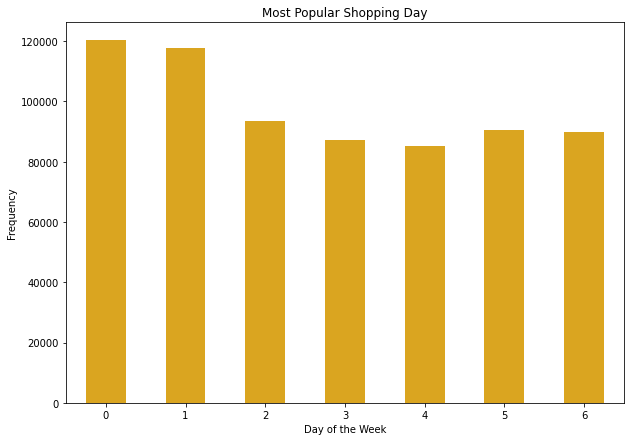

In [43]:
dow_groceries = orders['order_dow'].value_counts().sort_index()
print(dow_groceries)
dow_groceries.plot.bar(figsize=[10,7], title='Most Popular Shopping Day', xlabel='Day of the Week', ylabel='Frequency', color = 'goldenrod', rot=0)
plt.show()

#### Based on our graph, Monday and Tuesday are the most popular days to shop for groceries.

### [A4] How long do people wait until placing another order?

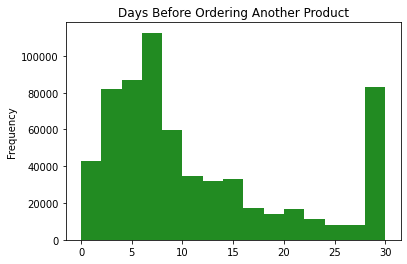

In [44]:
dspo_groceries = orders['days_since_prior_order'].mean()
orders['days_since_prior_order'].plot(kind='hist', bins = 15,color = 'forestgreen', title = 'Days Before Ordering Another Product')
                                                                                    
plt.show()

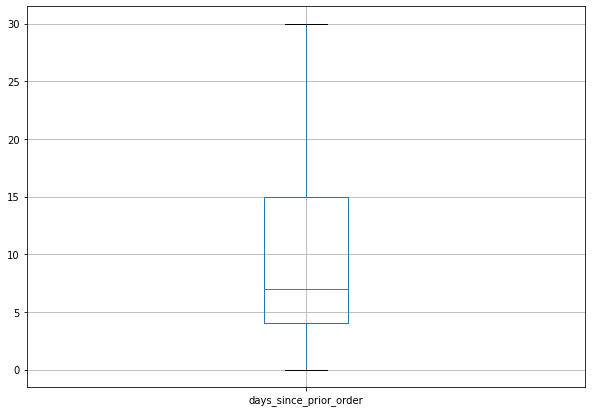

In [45]:
fig = plt.figure(figsize=(10,7))
#plt.boxplot(orders['days_since_prior_order']) #Didn't show anything.
orders.boxplot(column = "days_since_prior_order")
plt.show()

#### People wait around 2 - 7 days to place another order  with the 7th day being the average day of placing another order. The 7th day is also the highest frequency of re-orders. The re-orders generally spike around the 30th day as well. 

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [46]:
wednesdays = orders[orders['order_dow'] == 3]
wednesdays

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
5,2070296,51891,5,3,16,29.0
18,1065683,101171,3,3,15,13.0
19,2556377,176611,11,3,17,7.0
20,3287220,127451,15,3,15,28.0
28,2428778,162721,4,3,19,30.0
...,...,...,...,...,...,...
684170,2231079,21662,24,3,19,2.0
684172,1699694,149863,34,3,10,8.0
684180,1348728,85544,25,3,11,30.0
684181,1563911,20331,3,3,12,30.0


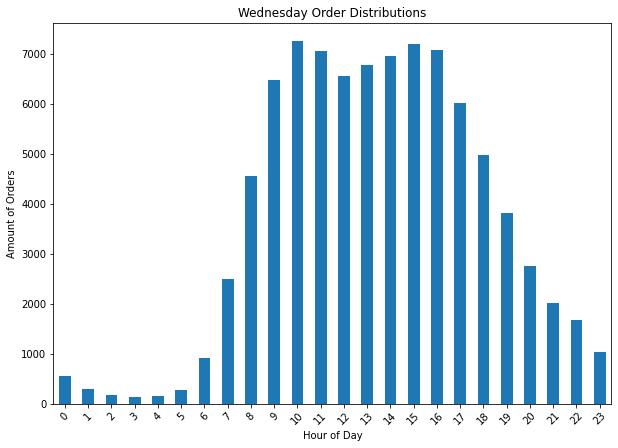

In [47]:
wednesday_hour_of_day = wednesdays['order_hour_of_day'].value_counts().sort_index()
#print(wednesday_hour_of_day)
wednesday_hour_of_day.plot.bar(figsize = [10,7], title = 'Wednesday Order Distributions', xlabel = 'Hour of Day', ylabel = 'Amount of Orders', rot = 45)
plt.show()

In [48]:
saturdays = orders[orders['order_dow'] == 6]
saturdays

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
8,144611,39682,12,6,16,9.0
21,2638219,39460,44,6,15,6.0
25,3143027,74962,76,6,21,10.0
26,2488393,52904,16,6,17,2.0
35,982286,28847,34,6,16,7.0
...,...,...,...,...,...,...
684196,886855,348,13,6,10,16.0
684200,3246745,137875,11,6,14,24.0
684207,419852,186584,6,6,9,7.0
684215,3064014,60807,30,6,17,2.0


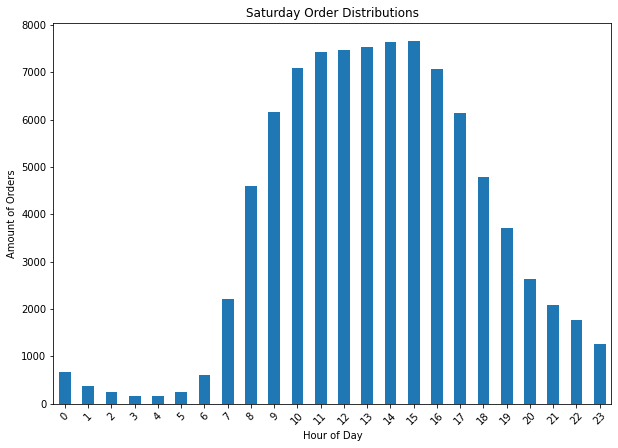

In [49]:
saturday_hour_of_day = saturdays['order_hour_of_day'].value_counts().sort_index()
saturday_hour_of_day
saturday_hour_of_day.plot.bar(figsize = [10,7], title = 'Saturday Order Distributions', xlabel = 'Hour of Day', ylabel = 'Amount of Orders', rot = 45)
plt.show()

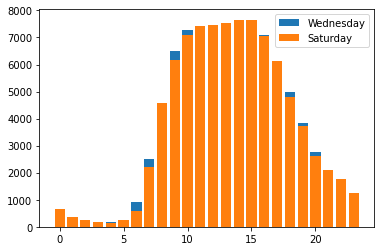

In [50]:

plt.bar(range(0,24), wednesday_hour_of_day)
plt.bar(range(0,24), saturday_hour_of_day)
plt.legend(['Wednesday', 'Saturday'])


plt.show()

#### The difference in the 'order_hour_of_day' distributions on Wednesdays and Saturdays are subtle but on Wednesdays from 12 pm to 2 pm the orders take a slight dip to around 4500, whereas on Saturdays the orders increase from 12 pm to 2 pm to just over 5000. 

### [B2] What's the distribution for the number of orders per customer?

In [51]:
#orders.info()
order_distribution = orders.groupby('user_id')['order_number'].count().sort_values()

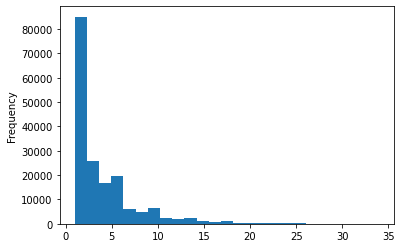

In [52]:
order_distribution.plot(kind='hist', bins = 25)
plt.show()

#### The frequency of the number of orders ordered per customer is between 1 and 15 orders with the number quickly declining from 1 order. 

### [B3] What are the top 20 popular products (display their id and name)?

In [53]:
#orders.info()
#products.info()
#order_products.info()
merged_orders = order_products.merge(products)
merged_orders.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17,0,Chicken Breast Tenders Breaded,129,1
1,147172,11440,7,1,Chicken Breast Tenders Breaded,129,1
2,3341719,11440,4,1,Chicken Breast Tenders Breaded,129,1
3,1938779,11440,8,1,Chicken Breast Tenders Breaded,129,1
4,1728338,11440,23,0,Chicken Breast Tenders Breaded,129,1
5,847715,11440,13,0,Chicken Breast Tenders Breaded,129,1
6,1463503,11440,1,0,Chicken Breast Tenders Breaded,129,1
7,331884,11440,5,1,Chicken Breast Tenders Breaded,129,1
8,1869056,11440,12,1,Chicken Breast Tenders Breaded,129,1
9,1772832,11440,3,1,Chicken Breast Tenders Breaded,129,1


In [54]:
most_popular_orders = merged_orders.groupby(['product_id', 'product_name'])['add_to_cart_order'].count().sort_values(ascending=False)
most_popular_orders.head(20)

product_id  product_name            
24852       Banana                      66050
13176       Bag of Organic Bananas      53297
21137       Organic Strawberries        37039
21903       Organic Baby Spinach        33971
47209       Organic Hass Avocado        29773
47766       Organic Avocado             24689
47626       Large Lemon                 21495
16797       Strawberries                20018
26209       Limes                       19690
27845       Organic Whole Milk          19600
27966       Organic Raspberries         19197
22935       Organic Yellow Onion        15898
24964       Organic Garlic              15292
45007       Organic Zucchini            14584
39275       Organic Blueberries         13879
49683       Cucumber Kirby              13675
28204       Organic Fuji Apple          12544
5876        Organic Lemon               12232
8277        Apple Honeycrisp Organic    11993
40706       Organic Grape Tomatoes      11781
Name: add_to_cart_order, dtype: int64

<AxesSubplot:title={'center':'Top 20 Grocery Store Purchases'}, xlabel='product_id,product_name', ylabel='Frequency'>

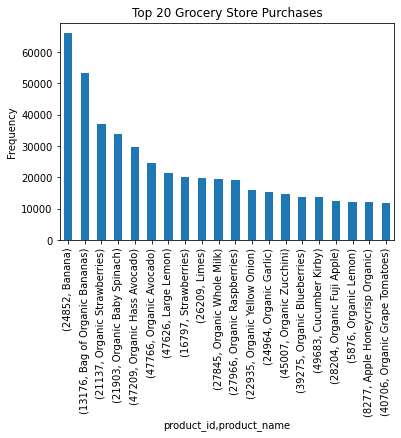

In [55]:
most_popular_orders.head(20).plot(kind='bar', title='Top 20 Grocery Store Purchases', ylabel = 'Frequency')

#### The 20 most popular items on Instacart consists of produce items, milk, and vegetables.

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [56]:
#order_products.info()
product_count = order_products.groupby('order_id').count()['product_id']
product_sorted = product_count.value_counts().sort_index()

In [57]:
#product_count.plot(kind='bar', figsize = [15,8], title='# of Items People Buy in an Order', xlabel='Items', ylabel='# of Items in Order')
#plt.show()

<AxesSubplot:title={'center':'# of Items People Buy in an Order'}, xlabel='Items', ylabel='# of Items in Order'>

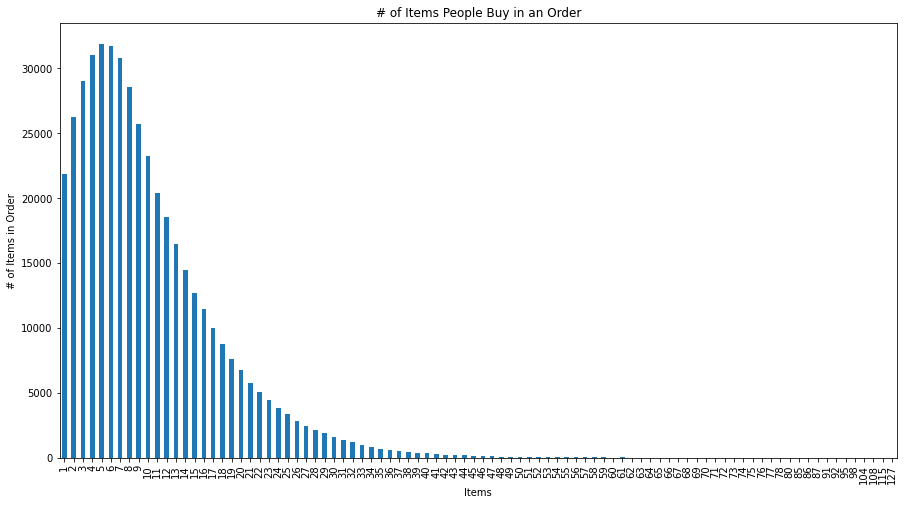

In [58]:
product_sorted.plot(kind='bar', figsize = [15,8], title='# of Items People Buy in an Order', xlabel='Items', ylabel='# of Items in Order')

<AxesSubplot:title={'center':'# of Items People Buy in an Order'}, xlabel='# of Items', ylabel='Orders'>

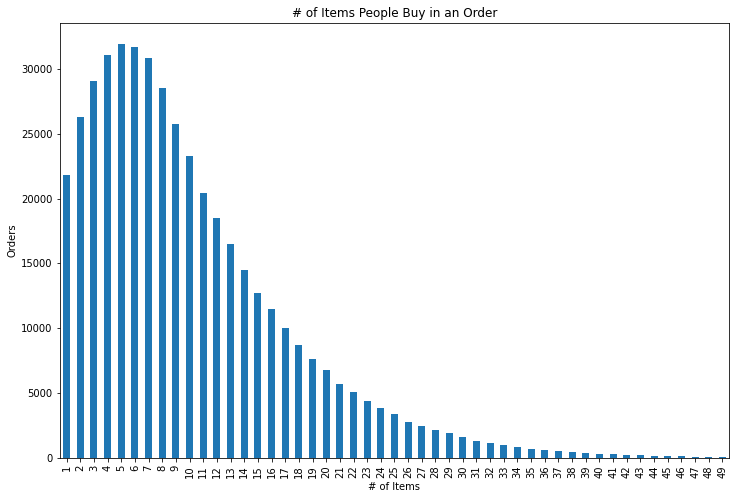

In [59]:
# Taking the top 50 items to make it look cleaner.
product_50 = product_sorted[product_sorted.index < 50]
product_50.plot(kind='bar', figsize = [12,8], title='# of Items People Buy in an Order', xlabel='# of Items', ylabel='Orders')

#### The typical amount of items in an order is from 4 to 7 items, with 5 being the most frequent amount of items ordered.

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [60]:
# order_products.max() = 1 So the biggest reorders are items with value 1.
re_ordered = order_products[order_products.reordered == 1]
re_ordered


,order_id,product_id,add_to_cart_order,reordered
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1
5,2456893,21616,4,1
...,...,...,...,...
4544999,1622300,24852,1,1
4545000,1125324,40600,6,1
4545002,577211,15290,12,1
4545004,692640,47766,4,1


In [61]:
# Need to merge with another dataset to get the names for the product_id.
merged_reorder = re_ordered.merge(products, on='product_id')
merged_reorder


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,567889,1560,1,1,Bag Of Ice,37,1
1,761899,1560,2,1,Bag Of Ice,37,1
2,1388514,1560,8,1,Bag Of Ice,37,1
3,2629631,1560,1,1,Bag Of Ice,37,1
4,866921,1560,6,1,Bag Of Ice,37,1
...,...,...,...,...,...,...,...
2683779,1338379,33506,3,1,Simply 9 White Meat Chicken & Whole Barley Rec...,40,8
2683780,191894,27878,3,1,Crackers Wheat Sundried Tomato Basil Crispy,78,19
2683781,3041739,31751,14,1,French Style Cut Green Beans,116,1
2683782,949244,24384,18,1,Invisible Matte Finish Tape,10,17


In [62]:
grouped_items = merged_reorder.groupby(['product_id', 'product_name']).size().sort_values(ascending=False)
top_20 = grouped_items.head(20)
top_20

product_id  product_name            
24852       Banana                      55763
13176       Bag of Organic Bananas      44450
21137       Organic Strawberries        28639
21903       Organic Baby Spinach        26233
47209       Organic Hass Avocado        23629
47766       Organic Avocado             18743
27845       Organic Whole Milk          16251
47626       Large Lemon                 15044
27966       Organic Raspberries         14748
16797       Strawberries                13945
26209       Limes                       13327
22935       Organic Yellow Onion        11145
24964       Organic Garlic              10411
45007       Organic Zucchini            10076
49683       Cucumber Kirby               9538
28204       Organic Fuji Apple           8989
8277        Apple Honeycrisp Organic     8836
39275       Organic Blueberries          8799
5876        Organic Lemon                8412
49235       Organic Half & Half          8389
dtype: int64

<AxesSubplot:xlabel='product_id,product_name'>

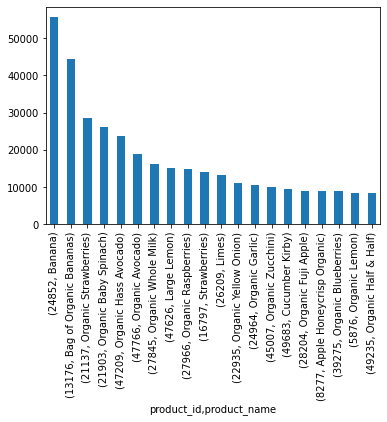

In [63]:
top_20.plot(kind='bar')

#### The top 20 most reordered products that were reordered most frequently were produce, vegetables, and milk.

### [C3] For each product, what proportion of its orders are reorders?

In [67]:
#products
#re_ordered
#order_products
re_ordered = order_products[order_products.reordered == 1]
merged_products = order_products.merge(products, how='inner')
merged_products
#total = 0
#if merged_products.reordered == 1:
#    total += merged_products.add_to_cart_order
# This didn't work but I realized that I was just trying to find the mean of the dataset.
# merged_products['reordered'].mean() but I have to do it for the entire dataset, need to use groupby with reordered.mean() at the end.
# mean_of_orders_reordered = merged_products.groupby(['product_name', 'add_to_cart_order'])['reordered'].mean() close but add_to_cart doesn't make sense to use
mean_of_orders_reordered = merged_products.groupby('product_name')['reordered'].mean()
mean_of_orders_reordered.sort_values(ascending=False).head(20)



product_name
Snack, Sweet Chili, Original                                         1.0
Honey Ham & Smoked White Turkey Sub Sandwich Kit                     1.0
Garlic Olives                                                        1.0
Honey Flake & Oat Clusters                                           1.0
Honey French Dressing                                                1.0
Medium Roast Hazelnut Herbal Coffee Alternative All-Purpose Grind    1.0
Vegetable Oil Cooking Spray                                          1.0
All Hair Types Pure Clean Styling Gel                                1.0
Ruby Grapefruit Segments                                             1.0
Vegetable Pancakes                                                   1.0
All Good Coconut Oil Skin Food Coconut                               1.0
Dark Chocolate Noir Sorbetto                                         1.0
Garlic Mill Spices                                                   1.0
Organic Carrots Baby Food             

#### The top products that are reordered 100% of the time don't have any correlation to each other.

### [C4] For each customer, what proportion of their products ordered are reorders?

In [68]:
# Similar to the one above. Need user's id's because we don't have customer information. Another merge.
#merged_users = merged_products.merge(orders)
#merged_users
#pct_of_reordered = merged_users.groupby('user_id')['reordered'].mean()
#pct_reordered_sorted = pct_of_reordered.sort_values(ascending=False)
#pct_reordered_sorted
order_product_orders = order_products.merge(orders)

order_product_orders.groupby('user_id')['reordered'].mean().sort_values(ascending=False).reset_index(name='pct_of_reorder')


,user_id,pct_of_reorder
0,99424,1.0
1,24402,1.0
2,24930,1.0
3,108423,1.0
4,62393,1.0
...,...,...
62504,107969,0.0
62505,152914,0.0
62506,182277,0.0
62507,50289,0.0


#### This dataframe shows the percentage of reorders per user, ordered in descending order grouped by user_id. Instacart can use this data to see how many reorders typically happen per customer and think of ways to improve the reorder rate if wanting an increase.

### [C5] What are the top 20 items that people put in their carts first? 

In [66]:
merged_product_order_prod = order_products.merge(products)
add_to_cart_1 = merged_product_order_prod[merged_product_order_prod['add_to_cart_order'] == 1]
add_to_cart_1
grouped_products = add_to_cart_1.groupby(['product_id', 'product_name'])['add_to_cart_order']
top_20_first_in_cart = grouped_products.size().sort_values(ascending=False).reset_index(name='Frequency').head(20)
top_20_first_in_cart

,product_id,product_name,Frequency
0,24852,Banana,15562
1,13176,Bag of Organic Bananas,11026
2,27845,Organic Whole Milk,4363
3,21137,Organic Strawberries,3946
4,47209,Organic Hass Avocado,3390
5,21903,Organic Baby Spinach,3336
6,47766,Organic Avocado,3044
7,19660,Spring Water,2336
8,16797,Strawberries,2308
9,27966,Organic Raspberries,2024


#### The top 20 items that people put into their carts are produce, hydration products including water and soda, and creamers for their coffees.

### In conclusion, looking at the products that customers are most interested in, I would recommend Instacart advertise and stock produce, vegetables, and drink products for their customers. I would recommend that Instacart have more staff available from 9 a.m. to 4 p.m. for the influx of orders that come at that time. Finally, I would recommend that on Day 0, which I would assume is Sunday and Day 1, which I would assume is Monday that they have more staff on hand because of the influx of shopping orders during those days. 